In [4]:
# load heatsequer and other modules
%matplotlib notebook
# heatsequer module is available from:
# https://github.com/amnona/heatsequer
import heatsequer as hs
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
# set display to full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# loading data

## Se jin fecal stability study

In [6]:
# load se jin storage study
sj=hs.load('/Users/amnon/Projects/bloom-filtering/data/storage.sejin.clean.withtax.biom','/Users/amnon/Projects/bloom-filtering/data/map.storage.sejin.txt')

('Loading biom table /Users/amnon/Projects/bloom-filtering/data/storage.sejin.clean.withtax.biom',)
09bf10ab84c3314a11407ba28180b370
('Loading mapping file /Users/amnon/Projects/bloom-filtering/data/map.storage.sejin.txt',)
('number of samples in map is 1142',)
('number of samples in table is 1525',)
('Table sample H1.rep2.amb.fresh.II not found in mapping file',)
('Table sample BLANK.7.12G not found in mapping file',)
('Table sample H5.rep1.amb.fresh.II not found in mapping file',)
('Table sample D1.rep3.amb.fresh.II not found in mapping file',)
('Table sample H5.rep2.amb.8weeks.II not found in mapping file',)
('Table sample D3.70etoh.4C.8weeks.II not found in mapping file',)
('Table sample H2.rep5.amb.fresh.II not found in mapping file',)
('Table sample H8.rep5.amb.8weeks.II not found in mapping file',)
('Table sample BLANK.8.11H not found in mapping file',)
('Table sample H4.70etoh.amb.fresh.II not found in mapping file',)
('Table sample BLANK.12.12H not found in mapping file',)
('T

In [7]:
# and keep only RT no preservative
# get no preservative
sjf=hs.filtersamples(sj,'preservative','None')
# and only room temp
sjf=hs.filtersamples(sjf,'temperature','amb')

('220 Samples left',)
('75 Samples left',)


In [8]:
# keep only samples with >1000 reads
sjf=hs.filterorigreads(sjf,1000)

('75 Samples left',)


## Mayo fecal stability study

In [9]:
mayo=hs.load('/Users/amnon/Projects/bloom-filtering/data/mayo.new.min10.clean.withtax.biom','/Users/amnon/Projects/bloom-filtering/data/map.mayo1.txt')

('Loading biom table /Users/amnon/Projects/bloom-filtering/data/mayo.new.min10.clean.withtax.biom',)
acbfaf6d2e684236fb7a5dca190c212e
('Loading mapping file /Users/amnon/Projects/bloom-filtering/data/map.mayo1.txt',)
('number of samples in map is 960',)
('number of samples in table is 958',)
('removing 0 samples',)
('deleted. number of samples in table is now 958',)
('removing 2 samples from mapping file',)
('number of samples in mapping file is now 958',)
('Samples with 0 reads: 18',)


In [10]:
# only no treatment
mayof=hs.filtersamples(mayo,'TREATMENT','No Additive')

('252 Samples left',)


In [11]:
# keep only samples with >1000 reads
mayof=hs.filterorigreads(mayof,1000)

('242 Samples left',)


## american gut

In [12]:
ag=hs.load('/Users/amnon/Projects/bloom-filtering/data/ag-6-2016.clean.min100.withtax.biom','/Users/amnon/Projects/bloom-filtering/data/map.ag-6-2016.txt')

('Loading biom table /Users/amnon/Projects/bloom-filtering/data/ag-6-2016.clean.min100.withtax.biom',)
5ffd56560ea3217b52a6076d5dd5d2f6
('Loading mapping file /Users/amnon/Projects/bloom-filtering/data/map.ag-6-2016.txt',)
('number of samples in map is 9919',)
('number of samples in table is 9919',)
('removing 0 samples',)
('deleted. number of samples in table is now 9919',)
('number of samples in mapping file is now 9919',)
('Samples with 0 reads: 1214',)


In [13]:
# get only fecal
agf=hs.filtersamples(ag,'ENV_MATTER','ENVO:feces')

('7286 Samples left',)


In [14]:
# convert date to number
agf=hs.convertdatefield(agf,'COLLECTION_DATE','date-numeric','%m/%d/%Y')

('1 conversions failed',)


In [15]:
agf=hs.sortsamples(agf,'date-numeric',numeric=True)

In [16]:
# keep only samples with >1000 reads
agf=hs.filterorigreads(agf,1000)

('7073 Samples left',)


## UK twins study

In [17]:
twins=hs.load('/Users/amnon/Projects/bloom-filtering/data/twins2.clean.min10.withtax.biom','/Users/amnon/Projects/bloom-filtering/data/map.twins2.txt')

('Loading biom table /Users/amnon/Projects/bloom-filtering/data/twins2.clean.min10.withtax.biom',)
d16fcd8fbbae6b25cbd464ab73950ba1
('Loading mapping file /Users/amnon/Projects/bloom-filtering/data/map.twins2.txt',)
('number of samples in map is 1081',)
('number of samples in table is 1046',)
('removing 0 samples',)
('deleted. number of samples in table is now 1046',)
('removing 35 samples from mapping file',)
('number of samples in mapping file is now 1046',)
('Samples with 0 reads: 29',)


In [18]:
# keep only high freq. enough bacteria
twinsf=hs.clusterbacteria(twins,50)

('2564 Bacteria left',)


In [19]:
# keep only samples with >1000 reads
twins=hs.filterorigreads(twins,1000)

('1017 Samples left',)


## PGP

In [20]:
pgp=hs.load('/Users/amnon/Projects/bloom-filtering/data/pgp.baylor.clean.withtax.biom','/Users/amnon/Projects/bloom-filtering/data/map.pgp.txt')

('Loading biom table /Users/amnon/Projects/bloom-filtering/data/pgp.baylor.clean.withtax.biom',)
7ca155612b152a9b7b20540489072e8e
('Loading mapping file /Users/amnon/Projects/bloom-filtering/data/map.pgp.txt',)
('number of samples in map is 429',)
('number of samples in table is 437',)
('Table sample Fermanagh.Mouth not found in mapping file',)
('Table sample Elmira.Stool not found in mapping file',)
('Table sample Erlandson.Stool not found in mapping file',)
('Table sample Innkeeper.Forehead not found in mapping file',)
('Table sample Tewmac.Mouth not found in mapping file',)
('Table sample Pinrock.Rightpalm not found in mapping file',)
('Table sample Lippokd.Forehead not found in mapping file',)
('Table sample Delmore.Leftpalm not found in mapping file',)
('Table sample Goddu.Forehead not found in mapping file',)
('Table sample Menekish.Stool not found in mapping file',)
('removing 10 samples',)
('deleted. number of samples in table is now 427',)
('removing 2 samples from mapping fil

In [21]:
# only fecal samples
pgpf=hs.filtersamples(pgp,'#SampleID','Stool',exact=False)

('80 Samples left',)


In [22]:
# keep only samples with >1000 reads
pgpf=hs.filterorigreads(pgpf,1000)

('79 Samples left',)


## ercolini whole grain feces

In [23]:
erc=hs.load('data/ercolini.feces.clean.withtax.biom','data/map.ercolini.txt')

('Loading biom table data/ercolini.feces.clean.withtax.biom',)
2ad21c8bdf0b14e5c60dc29494838d15
('Loading mapping file data/map.ercolini.txt',)
('number of samples in map is 96',)
('number of samples in table is 93',)
('removing 0 samples',)
('deleted. number of samples in table is now 93',)
('removing 3 samples from mapping file',)
('number of samples in mapping file is now 93',)
('Samples with 0 reads: 4',)


In [24]:
ercf=hs.filtersamples(erc,'env_matter','ENVO:feces')

('89 Samples left',)


In [25]:
# keep only samples with >1000 reads
ercf=hs.filterorigreads(ercf,1000)

('88 Samples left',)


# Analysis

## Calculate growth for bacteria in storage studies

In [31]:
def teststability(expdat,time0val='1',time1val='2',temp='amb',mincut=5,upres=False,time0temp='amb',timefield='time_numeric',tempfield='temp2',subjectfield='subject',presfield='preservative',printthresh=1000,bloomseqs=None):
    """
    calculate foldchange for all bacteria in storage experiment
    
    input:
    expdat - the experiment
    time0val - value for timepoint 0 (i.e. '1')
    time1val - value for timepoint 1 (i.e. '2' or '4')
    temp - the temperature (i.e. 'amb' or '20C' or 'Heat')
    mincut - the minimal number of reads (out of 10k) to round the number of reads to (to remove effect of discretization on small numbers)
    saveto - dir name to append the result statistics and figures or False to skip
    upres - False to do on all preservatives, otherwise list of unique preservatives (in order)
    time0temp - the temperature for time0 samples (default 'amb')
    bloomseqs: list of str (optional)
        the sequences in the blooming list (for highlight)

    output:
    fc : dict of float
        the log2 fold change per otu (keyed by sequence)
    """
    fc={}
    # keep only samples with enough reads
    expdat=hs.filterorigreads(expdat,2500)
    if tempfield=='':
        expdat0=hs.copyexp(expdat)
    else:
        expdat0=hs.filtersamples(expdat,tempfield,time0temp,exact=True)
        expdat=hs.filtersamples(expdat,tempfield,temp,exact=True)

    ids=hs.getfieldvals(expdat,subjectfield)
    uids=list(set(ids))
    pres=hs.getfieldvals(expdat,presfield,ounique=True)
    if len(pres)>1:
        raise RunTimeError('more than 1 preservative!!!')

    allvalsdict={}
    rat=[]
    for cid in expdat.sids:
        rat.append([])

    if bloomseqs is not None:
        bloomidx=[]
        bloomseqs=set(bloomseqs)
        for cidx,cseq in enumerate(expdat.seqs):
            if cseq in bloomseqs:
                bloomidx.append(cidx)

    atime0=hs.filtersamples(expdat0,timefield,time0val)
    atime1=hs.filtersamples(expdat,timefield,time1val)
    allx=[]
    ally=[]
    ccall=[]
    for ididx,cid in enumerate(uids):
        tp1=hs.findsamples(atime1,subjectfield,cid)
        tp0=hs.findsamples(atime0,subjectfield,cid)
        if len(tp1)==0:
            continue
        if len(tp0)==0:
            continue

        if len(tp0)>1:
            time0m=np.mean(atime0.data[:,tp0],1)
        else:
            time0m=atime0.data[:,tp0[0]]
        if len(tp1)>1:
            time1m=np.mean(atime1.data[:,tp1],1)
        else:
            time1m=atime1.data[:,tp1[0]]

        for otuidx,cid in enumerate(atime0.sids):
            if time0m[otuidx]<mincut:
                if time1m[otuidx]<mincut:
                    continue
                else:
                    time0m[otuidx]=mincut
            if time1m[otuidx]<mincut:
                time1m[otuidx]=mincut
            rat[otuidx].append(float(time1m[otuidx])/time0m[otuidx])
    vals=[]
    allvals=[]
    fids=[]
    ftax=[]
    fseqs=[]
    for idx,crat in enumerate(rat):
        if len(crat)>0:
            vals.append(np.log2(np.mean(crat)))
            allvals.append(np.log2(np.mean(crat)))
            fids.append(expdat.sids[idx])
            ftax.append(expdat.tax[idx])
            fseqs.append(expdat.seqs[idx])
        else:
            pass
#             allvals.append(0)
    print("number of outliers (10 fold) %d" % np.sum(np.abs(vals)>=np.log2(10)))
    print("fraction of outliers (10 fold) %f" % (float(np.sum(np.abs(vals)>=np.log2(10)))/len(vals)))
    print("mean abs log2 fold change %f" % np.mean(np.abs(vals)))
    print("median abs log2 fold change %f" % np.median(np.abs(vals)))

    outseqs={}
    # print the resulting otus
    for idx,cval in enumerate(vals):
        outseqs[fseqs[idx]]=2**cval
        if abs(cval)>=np.log2(printthresh):
            print('%f\t%f\t%s\t%s\n' % (2**cval, cval, fids[idx], ftax[idx]))

    plt.figure()
    plt.hist(allvals,100)
#    plt.yscale('log')
#   plt.ylim([0.5,len(allvals)])
    plt.ylim([0,70])
    plt.xlim([-12,12])
    plt.ylabel('number of otus',fontsize=24)
    plt.xlabel('log2(fold change)',fontsize=24)
    ax=plt.gca()
    ax.tick_params(axis='both', which='major', labelsize=24)
    plt.tight_layout()
    if bloomseqs is not None:
        for cidx in bloomidx:
            trat=rat[cidx]
            if len(trat)>0:
                plt.plot(np.log2(np.mean(trat)),3,'og')
            
    return outseqs

('241 Samples left',)
('92 Samples left',)
('74 Samples left',)
number of outliers (10 fold) 8
fraction of outliers (10 fold) 0.011817
mean abs log2 fold change 0.567105
median abs log2 fold change 0.384915


<IPython.core.display.Javascript object>


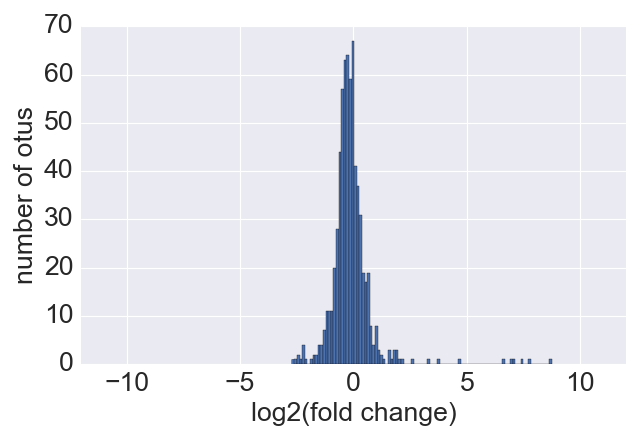

In [32]:
# mayo 4 days
mayo4fc=teststability(mayof,timefield='SAMPLE_VISIT',time0val='Day 0',time1val='Day 4',subjectfield='HOST_SUBJECT_ID',presfield='TREATMENT',tempfield='')

In [33]:
#plt.savefig('panels/fig1-hist-mayo-4-0.pdf')

('241 Samples left',)
('92 Samples left',)
('75 Samples left',)
number of outliers (10 fold) 6
fraction of outliers (10 fold) 0.008915
mean abs log2 fold change 0.412695
median abs log2 fold change 0.276347


<IPython.core.display.Javascript object>


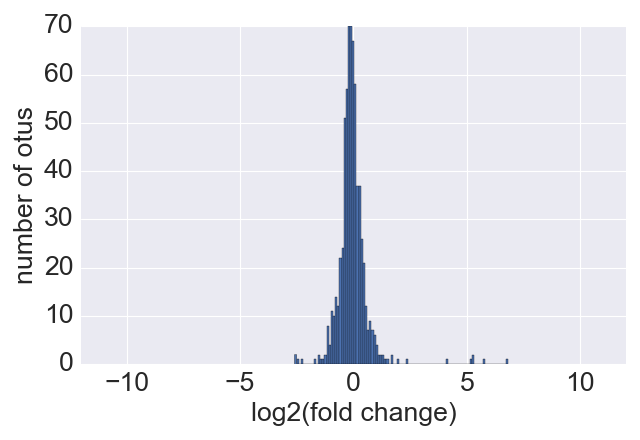

In [34]:
# mayo 1 day
mayo1fc=teststability(mayof,timefield='SAMPLE_VISIT',time0val='Day 0',time1val='Day 1',subjectfield='HOST_SUBJECT_ID',presfield='TREATMENT',tempfield='')

In [35]:
#plt.savefig('panels/fig1-hist-mayo-1-0.pdf')

('75 Samples left',)
('75 Samples left',)
('75 Samples left',)
('15 Samples left',)
('15 Samples left',)
number of outliers (10 fold) 8
fraction of outliers (10 fold) 0.011527
mean abs log2 fold change 0.867410
median abs log2 fold change 0.713038


<IPython.core.display.Javascript object>


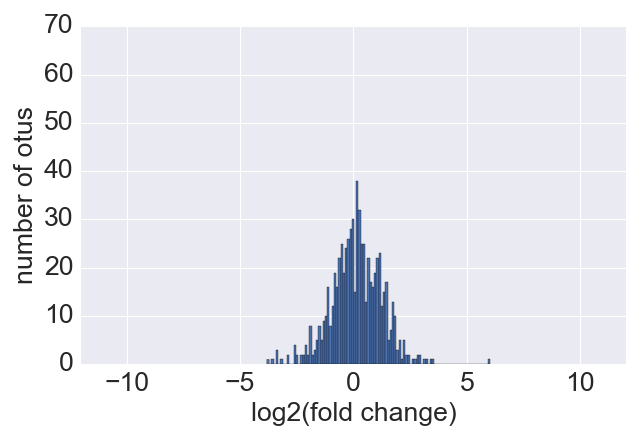

In [36]:
# se jin 1 week
sj7fc=teststability(sjf,time0val='1',time1val='2')

In [37]:
#plt.savefig('panels/fig1-hist-sejin-7-0.pdf')

('75 Samples left',)
('75 Samples left',)
('75 Samples left',)
('15 Samples left',)
('15 Samples left',)
number of outliers (10 fold) 39
fraction of outliers (10 fold) 0.051316
mean abs log2 fold change 1.234416
median abs log2 fold change 0.979320


<IPython.core.display.Javascript object>


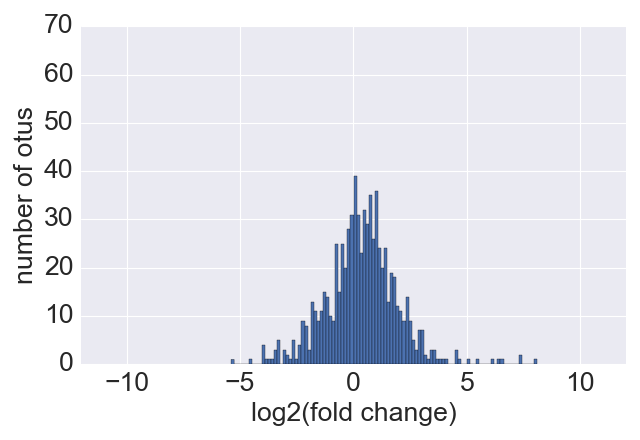

In [38]:
# se jin 2 weeks
sj14fc=teststability(sjf,time0val='1',time1val='3')

In [39]:
#plt.savefig('panels/fig1-hist-sejin-14-0.pdf')

('75 Samples left',)
('75 Samples left',)
('75 Samples left',)
('15 Samples left',)
('30 Samples left',)
number of outliers (10 fold) 65
fraction of outliers (10 fold) 0.085526
mean abs log2 fold change 1.430598
median abs log2 fold change 1.107019
1327.916470	10.374949	7054443	Bacteria;Firmicutes;Bacilli;Bacillales;Planococcaceae;Rummeliibacillus;;



<IPython.core.display.Javascript object>


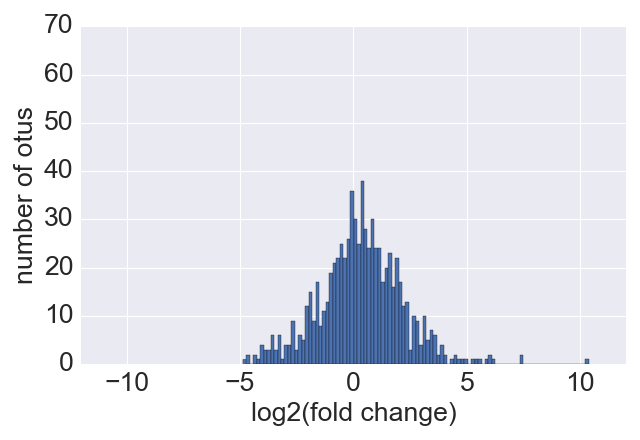

In [40]:
# se jin 4 weeks
sj28fc=teststability(sjf,time0val='1',time1val='4')

In [41]:
#plt.savefig('panels/fig1-hist-sejin-28-0.pdf')

## differential expression
look how AG compares to the fresh frozen studies.
Join all studies together and find sOTUs sginificantly higher/lower in AG

In [42]:
# join the experiments
fec=hs.joinexperiments(pgpf,twinsf)
fec=hs.joinexperiments(fec,ercf)
fec=hs.joinexperiments(fec,agf)

In [43]:
dd=hs.diffexpfastpermute(fec,'origexp','ag-6-2016.clean.min100.withtax.biom')

('7073 Samples left',)
('1214 Samples left',)
cnumperm 100, numbact 352, numnotuse 22546
cnumperm 1000, numbact 352, numnotuse 22546


/Users/amnon/Python/git/heatsequer/heatsequer/utils/amnonutils.py:323: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new_pvalues = np.empty(n)


('351 Bacteria left',)


<IPython.core.display.Javascript object>


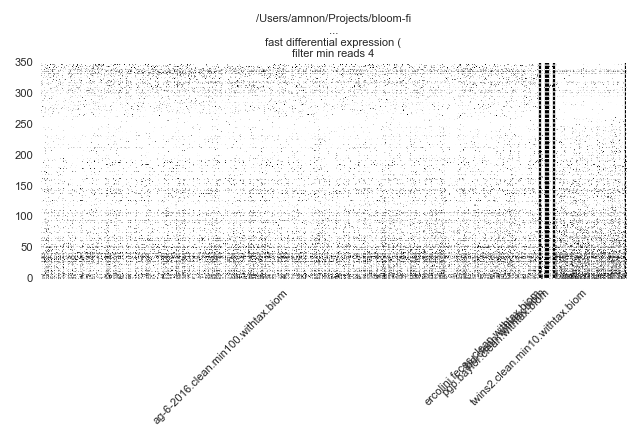

('Not using gui',)


/Users/amnon/anaconda/envs/qt5test/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


(<heatsequer.experiment.expclass.Experiment at 0x16a32d9e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16a7189e8>)

In [44]:
hs.plotexp(dd,'origexp',usegui=False)

## Get the fold change of american gut compared to all other experiments

In [45]:
def get2expfc(exp1,exp2):
    """
    get the fold change for all bacteria in exp1/exp2
    """
    outfc={}
    numnotfound=0
    for cseq in exp1.seqs:
        dat1=exp1.data[exp1.seqdict[cseq]]
        dat1[dat1<1]=1
        if cseq not in exp2.seqdict:
            numnotfound+=1
            dat2=np.ones(len(exp2.samples))
        else:
            dat2=exp2.data[exp2.seqdict[cseq]]
        dat2[dat2<1]=1
        fc=np.mean(dat1)/np.mean(dat2)
        outfc[cseq]=fc
    print('%d sequences not found' % numnotfound)
    return outfc

In [46]:
fcpgp=get2expfc(agf,pgpf)

5262 sequences not found


In [47]:
fctwins=get2expfc(agf,twinsf)

6875 sequences not found


In [48]:
fcerc=get2expfc(agf,ercf)

7739 sequences not found


# find the blooming bacteria list
intersect the ag-vs-others and the storage studies fold changes

<IPython.core.display.Javascript object>


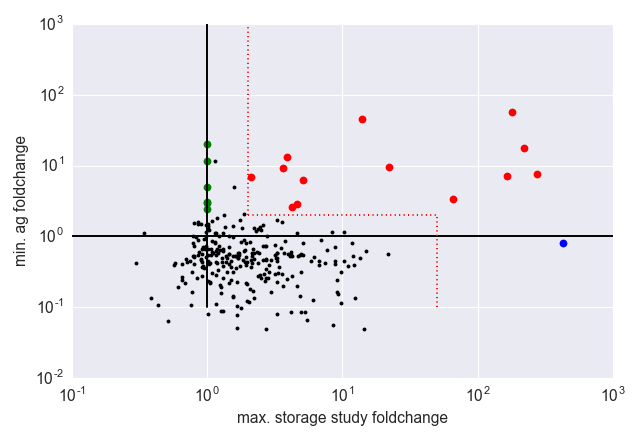

score:11.557930, agfc:11.557930, maxfc:0.000000, mayo1fc:-1.000000, mayo4fc:-1.000000, sejin7fc--1.000000, sejin14fc--1.000000, sejin28fc--1.000000
score:2.457423, agfc:2.457423, maxfc:0.000000, mayo1fc:-1.000000, mayo4fc:-1.000000, sejin7fc--1.000000, sejin14fc--1.000000, sejin28fc--1.000000
score:2.930602, agfc:2.930602, maxfc:0.000000, mayo1fc:-1.000000, mayo4fc:-1.000000, sejin7fc--1.000000, sejin14fc--1.000000, sejin28fc--1.000000
score:20.268196, agfc:20.268196, maxfc:0.000000, mayo1fc:-1.000000, mayo4fc:-1.000000, sejin7fc--1.000000, sejin14fc--1.000000, sejin28fc--1.000000
score:6.792566, agfc:2.574053, maxfc:4.218514, mayo1fc:-1.000000, mayo4fc:2.069963, sejin7fc--1.000000, sejin14fc-3.732809, sejin28fc-4.218514
score:8.964370, agfc:6.862510, maxfc:2.101859, mayo1fc:-1.000000, mayo4fc:1.398523, sejin7fc--1.000000, sejin14fc-2.101859, sejin28fc--1.000000
score:239.623763, agfc:17.805251, maxfc:221.818511, mayo1fc:39.913771, mayo4fc:221.818511, sejin7fc-2.186304, sejin14fc--1.00

In [50]:
# find the new blooming bacteria list
# test the min of the ag vs other experiments (y axis) and the max growth (in storage studies) (x axis)
plt.figure()
newbloom=[]
bloomscores=[]
bloomtax=[]
outfl=open('bloomingtable.txt','w')
outfl.write('taxonomy\tmin-ag-foldchange\tmax-storage-fc\tmayo-1-fc\tmayo-4-fc\tsj-7-fc\tsj-14-fc\tsj-28-fc\tsequence\n')

for idx,cseq in enumerate(dd.seqs):
    if cseq in agf.seqdict:
        cagfc=1000000
    else:
        continue
    if cseq in fcpgp:
        cagfc=min(cagfc,fcpgp[cseq])
    else:
        cagfc=min(cagfc,50)
    if cseq in fctwins:
        cagfc=min(cagfc,fctwins[cseq])
    else:
        cagfc=min(cagfc,50)
    if cseq in fcerc:
        cagfc=min(cagfc,fcerc[cseq])
    else:
        cagfc=min(cagfc,50)
        
    maxfc=0
    if cseq in mayo4fc:
        cm4fc=mayo4fc[cseq]
        maxfc=max(maxfc,cm4fc)
    else:
        cm4fc=-1
    if cseq in mayo1fc:
        cm1fc=mayo1fc[cseq]
        maxfc=max(maxfc,cm1fc)
    else:
        cm1fc=-1
    if cseq[:124] in sj7fc:
        csj7fc=sj7fc[cseq[:124]]
        maxfc=max(maxfc,csj7fc)
    else:
        csj7fc=-1
    if cseq[:124] in sj14fc:
        csj14fc=sj14fc[cseq[:124]]
        maxfc=max(maxfc,csj14fc)
    else:
        csj14fc=-1
    if cseq[:124] in sj28fc:
        csj28fc=sj28fc[cseq[:124]]
        maxfc=max(maxfc,csj28fc)
    else:
        csj28fc=-1
    
    plt.plot(maxfc,cagfc,'.k')
    # the criteria when to call it a bloom
    if (maxfc>2 and cagfc>2) or (maxfc>50) or (cagfc>2 and maxfc==0):
        cscore=cagfc+maxfc
        print('score:%f, agfc:%f, maxfc:%f, mayo1fc:%f, mayo4fc:%f, sejin7fc-%f, sejin14fc-%f, sejin28fc-%f' % (cscore,cagfc, maxfc, cm1fc,cm4fc,csj7fc,csj14fc,csj28fc))
        outfl.write('%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\n' % (dd.tax[idx],cagfc,maxfc,cm1fc,cm4fc,csj7fc,csj14fc,csj28fc,cseq))
        newbloom.append(cseq)
        bloomscores.append(maxfc)
        bloomtax.append(dd.tax[idx])
        if maxfc>2 and cagfc>2:
            symbol='or'
        elif maxfc>50:
            symbol='ob'
        else:
            symbol='og'
        if maxfc==0:
            maxfc=1
        plt.plot(maxfc,cagfc,symbol)

outfl.close()
plt.xlabel('max. storage study foldchange',fontsize=14)
plt.ylabel('min. ag foldchange',fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.plot([0.1,1000],[1,1],'k')
plt.plot([1,1],[0.1,1000],'k')
plt.plot([2,50],[2,2],':r')
plt.plot([50,50],[0.1,2],':r')
plt.plot([2,2],[2,1000],':r')
ax=plt.gca()
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

print('total %d blooming bacteria' % len(newbloom))

In [ ]:
#plt.savefig('panels/fig1-blooming-identification.pdf')

In [51]:
# sort the blooming bacteria according to score
sv,si=hs.isort(bloomscores)
newbloom=hs.reorder(newbloom,si)
bloomtax=hs.reorder(bloomtax,si)
bloomscores=hs.reorder(bloomscores,si)

In [52]:
# the sorted list of blooming bacteria
for idx,ctax in enumerate(bloomtax):
    print('%d : %d %s' % (idx,bloomscores[idx],ctax))

0 : 0 Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacteriales;Enterobacteriaceae;Providencia;;
1 : 0 Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas;;
2 : 0 Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacteriales;Enterobacteriaceae;
3 : 0 Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacteriales;Enterobacteriaceae;Proteus;;
4 : 0 Bacteria;Firmicutes;Bacilli;Bacillales;Bacillaceae;Bacillus;clausii;
5 : 0 Bacteria;Firmicutes;Bacilli;Bacillales;Staphylococcaceae;Staphylococcus;;
6 : 2 Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Acinetobacter;;
7 : 3 Bacteria;Firmicutes;Bacilli;Bacillales;Planococcaceae;Sporosarcina;ginsengi;
8 : 3 Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas;;
9 : 4 Bacteria;Firmicutes;Bacilli;Lactobacillales;Lactobacillaceae;Lactobacillus;zeae;
10 : 4 Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;uniformis;
11 : 

## save the bloom sequences

In [ ]:
#hs.saveseqsfasta(fecsmall,newbloom,'newbloom.20.fa')

In [ ]:
#hs.saveseqsfasta(fecsmall,newbloom[10:],'newbloom.10.fa')

In [ ]:
#hs.saveseqsfasta(fecsmall,newbloom[5:],'newbloom.15.fa')

# plot the taxonomy comparison before and after bloom filtering

## prepare the joined experiment

In [53]:
allf=hs.joinexperiments(agf,pgpf)

In [54]:
# remove the AG mapping fields (to make it faster)
hs.filtermapfields(allf,['origexp'],inplace=True)

In [55]:
allf=hs.joinexperiments(allf,twinsf)

In [56]:
allf=hs.joinexperiments(allf,ercf)

In [57]:
hs.filtermapfields(allf,['origexp'],inplace=True)

## Plot the pre-filtered taxonomy plot

In [58]:
allfpre=hs.filtersimilarsamples(allf,'origexp',method='mean')

('8257 samples before filtering, 4 after',)


In [59]:
allfpre=hs.sortsamples(allfpre,'origexp')

In [60]:
hs.getfieldvals(allfpre,'origexp')

['ag-6-2016.clean.min100.withtax.biom',
 'ercolini.feces.clean.withtax.biom',
 'pgp.baylor.clean.withtax.biom',
 'twins2.clean.min10.withtax.biom']

In [61]:
hs.addfield(allfpre,'expname',['AG-pre','EWF-pre','PGP-pre','UKTwins-pre'])

In [62]:
sn.set_style("white")

<IPython.core.display.Javascript object>


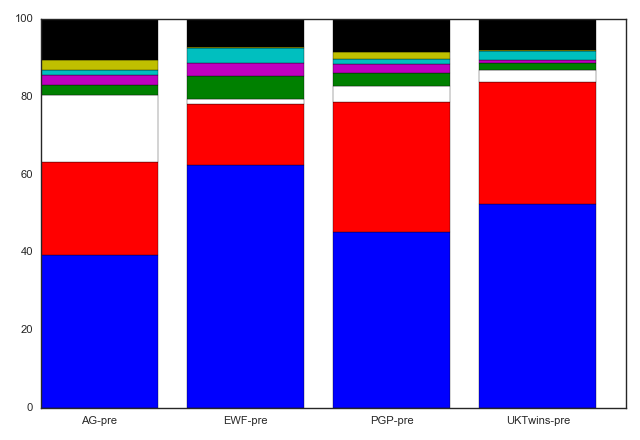

In [64]:
taxlist=hs.plottaxonomybar(allfpre,sortfield='expname',showlegend=False,showxlabels=True,rotation=0,sumone=True)

In [79]:
#plt.savefig('panels/fig2C_taxonomy-4exp-nofiltering.pdf')

## plot the post-filtering taxonomy plot

In [80]:
# filter the 15 blooming bacteria
allfpost=hs.filterseqs(allf,newbloom[5:],exclude=True)

In [81]:
allfpost=hs.filtersimilarsamples(allfpost,'origexp',method='mean')

('8257 samples before filtering, 4 after',)


In [83]:
allfpost=hs.sortsamples(allfpost,'origexp')

In [84]:
hs.getfieldvals(allfpost,'origexp')

['ag-6-2016.clean.min100.withtax.biom',
 'ercolini.feces.clean.withtax.biom',
 'pgp.baylor.clean.withtax.biom',
 'twins2.clean.min10.withtax.biom']

In [85]:
hs.addfield(allfpost,'expname',['AG-pre','EWF-pre','PGP-pre','UKTwins-pre'])

In [104]:
sn.set_style("white",{'legend.frameon':True})
sn.set_context("notebook")

<IPython.core.display.Javascript object>


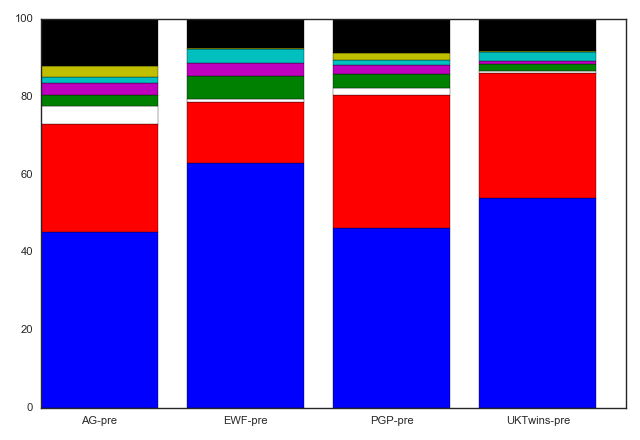

['Bacteria;Firmicutes;Clostridia',
 'Bacteria;Bacteroidetes;Bacteroidia',
 'Bacteria;Proteobacteria;Gammaproteobacteria',
 'Bacteria;Actinobacteria;Actinobacteria',
 'Bacteria;Firmicutes;Bacilli',
 'Bacteria;Firmicutes;Erysipelotrichi',
 'Bacteria;Proteobacteria;Alphaproteobacteria',
 'Other']

In [105]:
hs.plottaxonomybar(allfpost,sortfield='expname',showlegend=False,showxlabels=True,rotation=0,sumone=True,taxorder=taxlist.tax)

In [89]:
plt.savefig('panels/fig2C_taxonomy-4exp-withfiltering.pdf')

## and for the legend

<IPython.core.display.Javascript object>


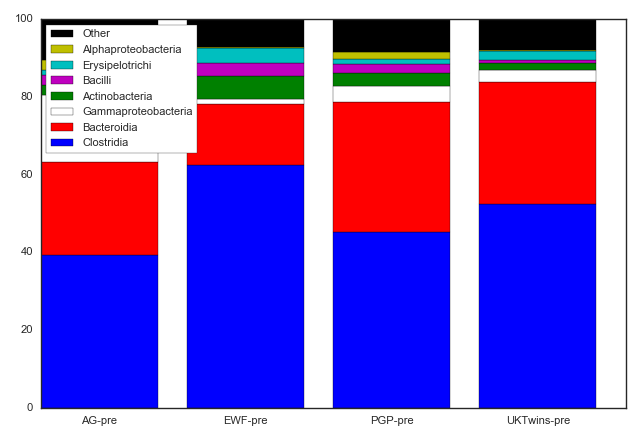

['Bacteria;Firmicutes;Clostridia',
 'Bacteria;Bacteroidetes;Bacteroidia',
 'Bacteria;Proteobacteria;Gammaproteobacteria',
 'Bacteria;Actinobacteria;Actinobacteria',
 'Bacteria;Firmicutes;Bacilli',
 'Bacteria;Firmicutes;Erysipelotrichi',
 'Bacteria;Proteobacteria;Alphaproteobacteria',
 'Other']

In [96]:
hs.plottaxonomybar(allfpre,sortfield='expname',showlegend=True,showxlabels=True,rotation=0,sumone=True)

In [97]:
plt.savefig('panels/fig2C_taxonomy-4exp-forlegend.pdf')

# try taxonomy plot for all samples

In [ ]:
shortbloom=[]
for cseq in newbloom:
    shortbloom.append(cseq[:124])

In [ ]:
agsub,_=hs.randomsplit(agf,100)

In [ ]:
hs.filtermapfields(agsub)

In [ ]:
pgpsub,_=hs.randomsplit(pgpf,100)

In [ ]:
hs.filtermapfields(pgpsub)

In [ ]:
taxlist=hs.plottaxonomybar(agsub,sortfield=None,showlegend=False,showxlabels=False)

In [ ]:
hs.plottaxonomybar(agsub,sortfield=0,showlegend=False,taxorder=taxlist,showxlabels=False)

In [ ]:
plt.savefig('panels/fig2c-sorted-ag-pre.pdf')

In [ ]:
hs.plottaxonomybar(pgpsub,sortfield=0,showlegend=False,taxorder=taxlist,showxlabels=False)

In [ ]:
plt.savefig('panels/fig2c-sorted-pgp-pre.pdf')

In [ ]:
agsubpost=hs.filterseqs(agsub,newbloom[5:],exclude=True)

In [ ]:
hs.plottaxonomybar(agsubpost,sortfield=0,showlegend=False,taxorder=taxlist,showxlabels=False)

In [ ]:
plt.savefig('panels/fig2c-sorted-ag-post.pdf')

In [ ]:
pgpsubpost=hs.filterseqs(pgpsub,newbloom[5:],exclude=True)

In [ ]:
hs.plottaxonomybar(pgpsubpost,sortfield=0,showlegend=False,taxorder=taxlist,showxlabels=False)

In [ ]:
plt.savefig('panels/fig2c-sorted-pgp-post.pdf')

# look at how filtering improves pcoa similarity

## Create small even mixture biom table from all experiments

In [107]:
np.random.seed(2016)
samplesperexp=200

In [108]:
# load the blooming bacteria list
bloomseqs,bloomnames=hs.readfastaseqs('/Users/amnon/Projects/bloom-filtering/newbloom.15.fa')

In [109]:
# randomly select 200 samples
small=hs.randomsplit(agf,samplesperexp)[0]

In [110]:
tt=hs.randomsplit(pgpf,samplesperexp)[0]
small=hs.joinexperiments(small,tt)

('Less samples (79) than requested (200)',)


In [111]:
tt=hs.randomsplit(ercf,samplesperexp)[0]
small=hs.joinexperiments(small,tt)

('Less samples (88) than requested (200)',)


In [112]:
# randomly select 200 samples
tt=hs.randomsplit(twinsf,samplesperexp)[0]
small=hs.joinexperiments(small,tt)

In [114]:
# remove low freq. sOTUs (less than 10 reads total)
small=hs.filterminreads(small,10)

('9652 Bacteria left',)


In [115]:
hs.filtermapfields(small,['origexp'],inplace=True)

In [ ]:
hs.savetobiom(small,'combined.new.small.biom',useorigreads=True)

In [117]:
# filter blooming bacteria
smallnobloom=hs.filterseqs(small,bloomseqs,exclude=True)

In [ ]:
hs.savetobiom(smallnobloom,'combined.new.small.nobloom.biom',useorigreads=True)

## add bloom level as a mapping field

In [119]:
smallf=hs.addmapfield(small,'bloomlevel',0)

In [120]:
tt=hs.filterseqs(small,bloomseqs)

In [121]:
for idx,csamp in enumerate(tt.samples):
    smallf.smap[csamp]['bloomlevel']=str(np.round(np.sum(tt.data[:,idx]))+1)

In [ ]:
hs.savemap(smallf,'combined.new.small.withbloomlevel.map.txt')

## plot emperor pcoa (in notebook!)

In [122]:
from emperor import Emperor
import pandas as pd

In [123]:
from emperor import Emperor, nbinstall
from skbio import OrdinationResults

from emperor.qiime_backports.parse import parse_mapping_file
from emperor.qiime_backports.format import format_mapping_file

from skbio.io.util import open_file


In [124]:
def load_mf(fn):
    with open_file(fn) as f:
        mapping_data, header, _ = parse_mapping_file(f)
        _mapping_file = pd.DataFrame(mapping_data, columns=header)
        _mapping_file.set_index('SampleID', inplace=True)
    return _mapping_file


In [125]:
pmf=load_mf('combined.new.small.withbloomlevel.map.txt')

In [126]:
nbinstall()


In [127]:
resbloom = OrdinationResults.read('pcoa.bloom.bc.txt')

In [128]:
resnobloom = OrdinationResults.read('pcoa.nobloom.bc.txt')

In [130]:
x = Emperor(resbloom, pmf, remote=False)

In [133]:
# need to convert to int (otherwise problem with emperor size from field)
x.mf.bloomlevel=x.mf.bloomlevel.astype(float).astype(int)

In [ ]:
x

In [135]:
xnobloom = Emperor(resnobloom, pmf, remote=False)

In [136]:
xnobloom.mf.bloomlevel=xnobloom.mf.bloomlevel.astype(float).astype(int)

In [ ]:
xnobloom

# Plot Fig1E - selecting blooming bacteria with KDE

<IPython.core.display.Javascript object>


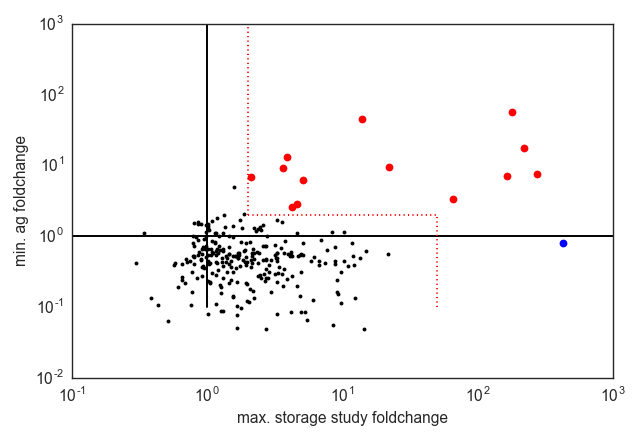

score:11.557930, agfc:11.557930, maxfc:0.000000, mayo1fc:-1.000000, mayo4fc:-1.000000, sejin7fc--1.000000, sejin14fc--1.000000, sejin28fc--1.000000
score:2.457423, agfc:2.457423, maxfc:0.000000, mayo1fc:-1.000000, mayo4fc:-1.000000, sejin7fc--1.000000, sejin14fc--1.000000, sejin28fc--1.000000
score:2.930602, agfc:2.930602, maxfc:0.000000, mayo1fc:-1.000000, mayo4fc:-1.000000, sejin7fc--1.000000, sejin14fc--1.000000, sejin28fc--1.000000
score:20.268196, agfc:20.268196, maxfc:0.000000, mayo1fc:-1.000000, mayo4fc:-1.000000, sejin7fc--1.000000, sejin14fc--1.000000, sejin28fc--1.000000
score:6.792566, agfc:2.574053, maxfc:4.218514, mayo1fc:-1.000000, mayo4fc:2.069963, sejin7fc--1.000000, sejin14fc-3.732809, sejin28fc-4.218514
score:8.964370, agfc:6.862510, maxfc:2.101859, mayo1fc:-1.000000, mayo4fc:1.398523, sejin7fc--1.000000, sejin14fc-2.101859, sejin28fc--1.000000
score:239.623763, agfc:17.805251, maxfc:221.818511, mayo1fc:39.913771, mayo4fc:221.818511, sejin7fc-2.186304, sejin14fc--1.00

In [146]:
# find the new blooming bacteria list
# test the min of the ag vs other experiments (y axis) and the max growth (in storage studies) (x axis)
plt.figure()
newbloom=[]
bloomscores=[]
bloomtax=[]
allx=[]
ally=[]
intx=[]
inty=[]
intsym=[]

for idx,cseq in enumerate(dd.seqs):
    if cseq in agf.seqdict:
        cagfc=1000000
    else:
        continue
    if cseq in fcpgp:
        cagfc=min(cagfc,fcpgp[cseq])
    else:
        cagfc=min(cagfc,50)
    if cseq in fctwins:
        cagfc=min(cagfc,fctwins[cseq])
    else:
        cagfc=min(cagfc,50)
    if cseq in fcerc:
        cagfc=min(cagfc,fcerc[cseq])
    else:
        cagfc=min(cagfc,50)
        
    maxfc=0
    if cseq in mayo4fc:
        cm4fc=mayo4fc[cseq]
        maxfc=max(maxfc,cm4fc)
    else:
        cm4fc=-1
    if cseq in mayo1fc:
        cm1fc=mayo1fc[cseq]
        maxfc=max(maxfc,cm1fc)
    else:
        cm1fc=-1
    if cseq[:124] in sj7fc:
        csj7fc=sj7fc[cseq[:124]]
        maxfc=max(maxfc,csj7fc)
    else:
        csj7fc=-1
    if cseq[:124] in sj14fc:
        csj14fc=sj14fc[cseq[:124]]
        maxfc=max(maxfc,csj14fc)
    else:
        csj14fc=-1
    if cseq[:124] in sj28fc:
        csj28fc=sj28fc[cseq[:124]]
        maxfc=max(maxfc,csj28fc)
    else:
        csj28fc=-1
    
    if maxfc>0 and cagfc>0:
        allx.append(maxfc)
        ally.append(cagfc)
    plt.plot(maxfc,cagfc,'.k')
    # the criteria when to call it a bloom
    if (maxfc>2 and cagfc>2) or (maxfc>50) or (cagfc>2 and maxfc==0):
        cscore=cagfc+maxfc
        print('score:%f, agfc:%f, maxfc:%f, mayo1fc:%f, mayo4fc:%f, sejin7fc-%f, sejin14fc-%f, sejin28fc-%f' % (cscore,cagfc, maxfc, cm1fc,cm4fc,csj7fc,csj14fc,csj28fc))
        newbloom.append(cseq)
        bloomscores.append(maxfc)
        bloomtax.append(dd.tax[idx])
        if maxfc>2 and cagfc>2:
            symbol='or'
        elif maxfc>50:
            symbol='ob'
        else:
            symbol='og'
        if maxfc==0:
            maxfc=0
        intx.append(maxfc)
        inty.append(cagfc)
        intsym.append(symbol)
        plt.plot(maxfc,cagfc,symbol)

plt.xlabel('max. storage study foldchange',fontsize=14)
plt.ylabel('min. ag foldchange',fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.plot([0.1,1000],[1,1],'k')
plt.plot([1,1],[0.1,1000],'k')
plt.plot([2,50],[2,2],':r')
plt.plot([50,50],[0.1,2],':r')
plt.plot([2,2],[2,1000],':r')
ax=plt.gca()
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

print('total %d blooming bacteria' % len(newbloom))

<IPython.core.display.Javascript object>


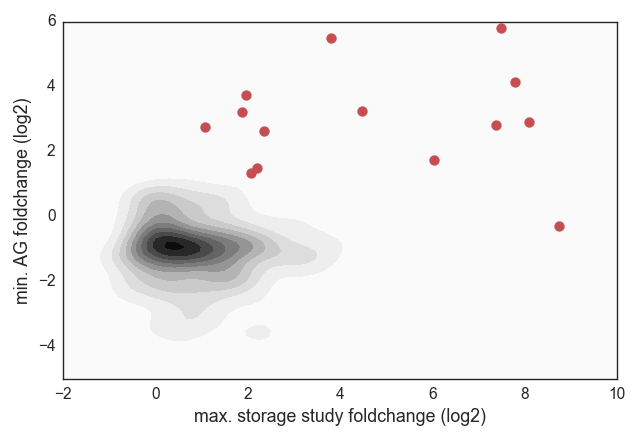

In [147]:
plt.figure()
ax = plt.axes()
sn.kdeplot(np.log2(np.array(allx)),np.log2(np.array(ally)),shade=True, cmap='Greys', ax=ax)
plt.scatter(np.log2(np.array(intx)), np.log2(np.array(inty)), s=80, color=sn.color_palette()[2])
ax.set_xlim([-2, 10])
ax.set_ylim([-5, 6])
ax.set_xlabel('max. storage study foldchange (log2)',fontsize=16)
ax.set_ylabel('min. AG foldchange (log2)',fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

In [148]:
plt.savefig('panels/fig1-blooming-identification-kde-2.pdf')